You are given the root of a binary tree with n nodes. Each node is uniquely assigned a value from 1 to n. You are also given an integer startValue representing the value of the start node s, and a different integer destValue representing the value of the destination node t.
<br>
Find the shortest path starting from node s and ending at node t. Generate step-by-step directions of such path as a string consisting of only the uppercase letters 'L', 'R', and 'U'. Each letter indicates a specific direction:<br>
<br>
'L' means to go from a node to its left child node.<br>
'R' means to go from a node to its right child node.<br>
'U' means to go from a node to its parent node.<br>
Return the step-by-step directions of the shortest path from node s to node t.<br>
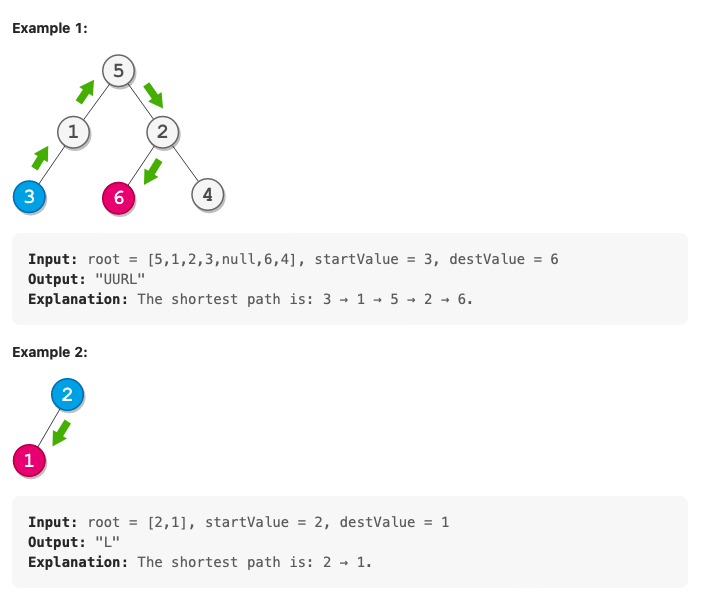

In [31]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [52]:
a = TreeNode(5)
b = TreeNode(1)
c = TreeNode(2)
a.left = b
a.right = c
b.left = TreeNode(3)
c.left = TreeNode(6)
c.right = TreeNode(4)

In [63]:
import collections
def getDirections(root, startValue,destValue):
    #data sctructure
    graph = collections.defaultdict(list)
    #traverse tree
    queue = [root]
    
    while queue:
        curr = queue.pop(0)
        if curr.left:
            graph[curr.val].append((curr.left.val,"L"))
            graph[curr.left.val].append((curr.val,"U"))
            queue.append(curr.left)
        if curr.right:
            graph[curr.val].append((curr.right.val,"R"))
            graph[curr.right.val].append((curr.val,"U"))
            queue.append(curr.right)
    
    #Seen nodes in graph
    visited = set()
    queue = [(startValue,"")]
    while queue:
        curr_node_val, path = queue.pop(0)
        
        if curr_node_val in visited:
            continue
        visited.add(curr_node_val)
        if curr_node_val == destValue:
            return path
        else:
            for c,p in graph[curr_node_val]:
                queue.append((c,path+p))

In [64]:
getDirections(a,3,6)

'UURL'